In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


It is a binary classification problem. This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.Based on the data, bank can prevent the execution of their cutomers by providing more services, more facilities, etc. 

In [5]:
# Divide the dataset into dependent and independent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
# Feature Engineering
# Converting categorical values into numerical values

geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
# concatenate these variables in the dataset
# first drop the geography and gender column

X = X.drop(['Geography','Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
X = pd.concat([X,geography,gender], axis=1)

In [11]:
# spliting the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
X_train.shape

(8000, 11)

**ANN** **Model**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, ELU, PReLU
from tensorflow.keras.layers import Dropout

In [17]:
# intialize the ANN

classifier = Sequential()

In [18]:
# adding the input layer

classifier.add(Dense(units = 11, activation='relu'))

In [19]:
# adding the first hidden layer

classifier.add(Dense(units = 7, activation= 'relu'))
classifier.add(Dropout(0.2))

In [20]:
# adding the second hidden layer

classifier.add(Dense(units = 6, activation= 'relu'))
classifier.add(Dropout(0.3))

In [21]:
# adding the output layer

classifier.add(Dense(1, activation= 'sigmoid'))

In [22]:
# importing learning rate (by defalut adam optimizer uses the learning rate 0.01)

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [23]:
classifier.compile(optimizer= opt, loss='binary_crossentropy', metrics= ['accuracy'])

In [24]:
# early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [25]:
from keras.api._v2.keras import callbacks
# training the model

model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size=10, epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 8s 9ms/step - loss: 0.4865 - accuracy: 0.7936 - val_loss: 0.4335 - val_accuracy: 0.8126
Epoch 2/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4419 - accuracy: 0.8181 - val_loss: 0.4222 - val_accuracy: 0.8141
Epoch 3/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4246 - accuracy: 0.8268 - val_loss: 0.3970 - val_accuracy: 0.8436
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3996 - accuracy: 0.8358 - val_loss: 0.3783 - val_accuracy: 0.8478
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3901 - accuracy: 0.8408 - val_loss: 0.3828 - val_accuracy: 0.8410
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3969 - accuracy: 0.8364 - val_loss: 0.3769 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3897 - accuracy: 0.8395 - val_loss: 0.3686 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

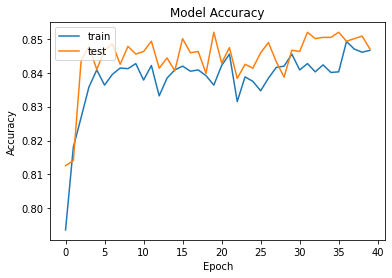

In [27]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train','test'], loc= 'upper left')
plt.show()

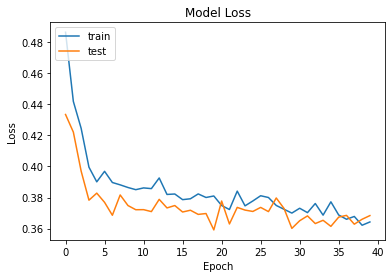

In [28]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train','test'], loc= 'upper left')
plt.show()

In [29]:
# making predictions and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [30]:
# create the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1560,   35],
       [ 244,  161]])

In [31]:
# calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [32]:
score

0.8605

In [33]:
# get the weights

classifier.get_weights()

[array([[-0.4310456 ,  0.3742712 , -0.39855567,  0.46966752, -0.1343721 ,
         -0.11077655,  0.03081483,  0.33978486, -0.3069621 , -0.4475022 ,
         -0.17620987],
        [-3.0681424 ,  0.7251378 ,  1.0205299 , -2.354758  , -1.8506992 ,
          2.5564702 ,  0.37049773, -0.9240231 ,  2.8999975 , -0.5272736 ,
          1.7289504 ],
        [-0.6232691 ,  0.68291616,  0.2097676 , -0.5110678 ,  0.8656332 ,
          0.07950629,  0.07695856, -0.07041825, -0.54075813, -1.3053799 ,
         -0.8391162 ],
        [-0.25452605, -0.807892  , -2.594737  , -0.7217435 , -2.5316083 ,
         -0.06479885,  0.26157725, -1.6747321 ,  0.0752017 , -0.07470169,
          2.7864792 ],
        [ 0.14972463,  1.3281708 , -3.388698  ,  0.48542356,  0.09501836,
         -0.05786068,  3.7402573 ,  0.74137217,  0.24562216,  0.01833068,
          0.72035146],
        [ 0.21321484, -0.4769328 , -0.37138084, -0.7255453 , -0.92355156,
         -0.14135225,  0.44549036,  0.67396873, -0.2158205 , -0.1208618

In [34]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])